# Analyzing Group Differences

In these exercises, we'll explore testing differences between group means.  This is useful when I'd like to know something about how two quantitative variables differ between Group A and Group B.  In a geographical context, we might want to know, for instance, <a href="https://hpi.georgetown.edu/rural/">whether people living in urban areas tend to be healthier or less healthy than those living in rural areas</a>.  How could we make this comparison?

When testing two groups, we generally use a <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">t-test</a>.  When testing more than two groups for differences, we generally use an <a href="https://en.wikipedia.org/wiki/Analysis_of_variance">ANOVA</a>.  If our variables are not normally distributed, we'll often <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">transform our variable</a> (e.g., with something like a log transform), or we can use <a href="https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance">non-parametric versions of our tests</a>.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Giving Fake Growth Serum to Fake Rats

Suppose I'm a mad scientist testing out a <a href="https://princessbride.fandom.com/wiki/R.O.U.S.">growth serum for rats</a>.

Apart from actually making the growth serum, how do I know if it's working?

I can use t-tests to help me analyze my data.

### Simulating Rats

We'll suppose our rats have a <a href="https://en.wikipedia.org/wiki/Mean">mean</a> length of 12.1 cm, with a <a href="https://en.wikipedia.org/wiki/Standard_deviation">standard deviation</a> of 1.8 cm.

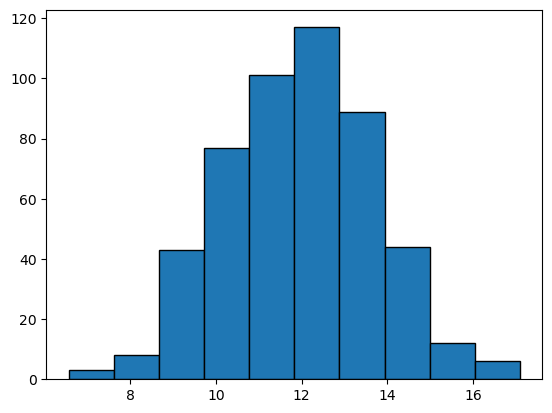

In [2]:
n = 500
length_mean = 12.1
length_sd = 1.8

some_rats = np.random.normal(loc=length_mean, scale=length_sd, size=n)

_ = plt.hist(some_rats,bins=10,edgecolor='k')

### Simulating Growth Serum

In addition to simulating rats, we'll have to simulate the effect of our growth serum.  You can adjust these values later if you want, but let's start with this:

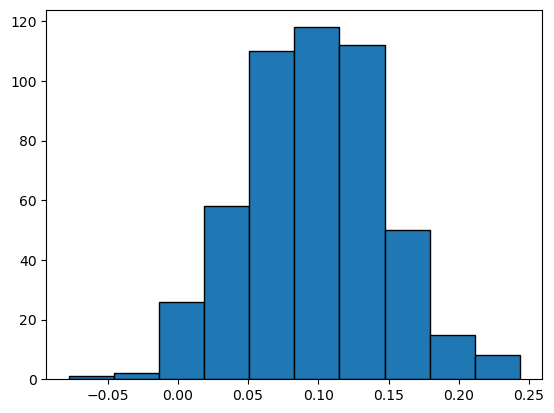

In [3]:
# This is our first batch, so the effects are somewhat weak:
serum_mean_length_increase = .1  # cm
serum_sd_length_increase = .05   # cm

# We'll model our growth serum with a normal distribution:
growth_serum = np.random.normal(serum_mean_length_increase, serum_sd_length_increase, n)

# Let's look at the distribution.  Notice that in rare cases, the serum will cause the rats to slightly shrink!
_ = plt.hist(growth_serum,bins=10,edgecolor='k')

### T-Tests on Related Samples

In my best-case scenario, my experiment looks like this:

* I measure the length of the rats.  
* I give them the growth serum.
* I measure their length a little while later.

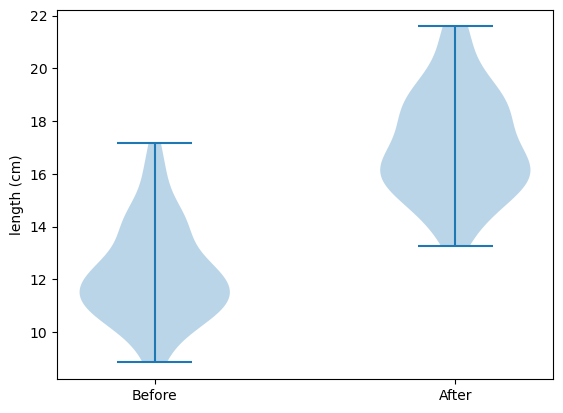

In [4]:
n = 50
rat_m = 12.1
rat_sd = 1.8
serum_m = 5.0     # Let's simulate a very 
serum_sd = 1.0    # strong serum to start with

# Run the "experiment"
before_rats = np.random.normal(rat_m, rat_sd, n)
growth_serum = np.random.normal(serum_m, serum_sd, n)
after_rats = before_rats + growth_serum

# Plot the results
plt.figure()
ax = plt.subplot(111)
_ = plt.violinplot((before_rats,after_rats))
_ = ax.set_xticks([1,2])
_ = ax.set_xticklabels(['Before','After'])
_ = plt.ylabel('length (cm)')

In [6]:
# This clearly worked!  We can run a t-test to confirm.  
# We run a RELATED t-test, since we measured the same rats before and after.

t,p = stats.ttest_rel(before_rats,after_rats)
print('t =',t,' p =',p)

# The p-value is quite low.  Notice this is in scientific notation.  
# Values are generated randomly, but on one run, I received a p-value of: 
# p = 4.5423694976383266e-36
#
# This means that the number is 4.54 x 10^-36, a very small number!  Far, far less than P = .001.  
# We would generally report this value as "P < 0.001"

t = -32.42388345907103  p = 9.053671159746565e-35


### Reporting P values

We would generally report this value as <u>p < 0.001</u> meaning there is less than 1 chance in a thousand that we would see this much of a difference in mean by random sampling, if indeed our true means were the same. Intepreting p-values can take practice, so <a href="https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values">be sure to read more about it</a> if you find this confusing.  
    
In practice there are few critical thresholds for p-values:
* p < .05, indicating a less than 1 in 20 chance.  This is generally the minimum threshold for "statistical significance".
* p < .01, indicating a less than 1 in 100 chance.
* p < .001, indicating a less than 1 in 1000 chance.  This is generally the smallest p-value we report.
           
Although I use lowercase letters here for convenience, P should be reported as a capital letter.  See these guidelines for <a href="https://support.jmir.org/hc/en-us/articles/360000002012-How-should-P-values-be-reported-">how to report P values</a>.  Remember, p-values are never zero!    

### What about a weaker serum?

mean of before rats: 12.11220802777436
mean of after rats: 12.210682798051446
t = -15.538349766742922  p = 1.4386257543118618e-20


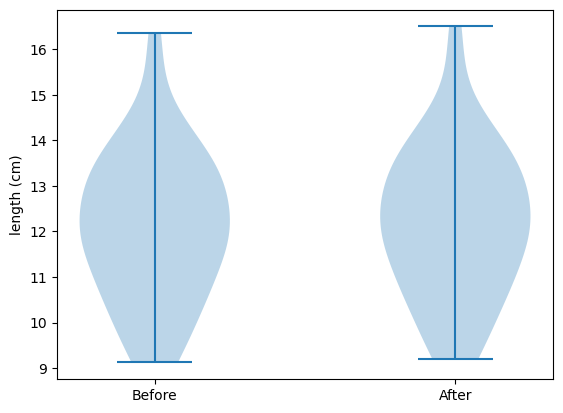

In [7]:
n = 50
rat_m = 12.1
rat_sd = 1.8
serum_m = 0.1     # Let's simulate a weaker serum
serum_sd = 0.05    

# Run the "experiment"
before_rats = np.random.normal(rat_m, rat_sd, n)
growth_serum = np.random.normal(serum_m, serum_sd, n)
after_rats = before_rats + growth_serum

# Plot the results
plt.figure()
ax = plt.subplot(111)
_ = plt.violinplot((before_rats,after_rats))
_ = ax.set_xticks([1,2])
_ = ax.set_xticklabels(['Before','After'])
_ = plt.ylabel('length (cm)')

print('mean of before rats:',np.mean(before_rats))
print('mean of after rats:',np.mean(after_rats))

t,p = stats.ttest_rel(before_rats,after_rats)
print('t =',t,' p =',p)

# Even though the distributions aren't visually distinct, the statistical test is still able to pick up
# differences.  In my run, p was still less than 0.001 (in fact, 8.79 x 10^-19).

# T-Tests on Independent Samples

In this scenario, my experiment looks like this:

* I get 100 rats from my rat dealer, and I divide them into two groups of 50 each
* Group A (control_rats) recieve no treatment, I only measure them.
* I give my growth serum to Group B (treatment_rats), I wait a while, and then measure them.

If this doesn't seem quite as good of a set up, you're right!  It's not.  As a result, <a href="https://en.wikipedia.org/wiki/Power_(statistics)">statistical power will be much lower</a> - it will be harder to tell whether the treatment worked or not.  However, with geographic data, we may not have the luxury of performing true "experiments" - we may only be able to analyze collected data.

mean of before rats: 12.08237536535181
mean of after rats: 12.206941056949823
t = -2.460861780359917  p = 0.013893941515262586


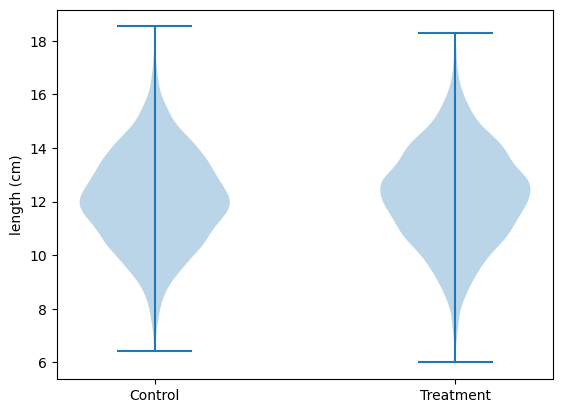

In [8]:
n = 2500
rat_m = 12.1
rat_sd = 1.8
serum_m = 0.1     # Let's simulate a weaker serum
serum_sd = 0.05    


# Run the "experiment"
control_rats = np.random.normal(rat_m, rat_sd, n)

growth_serum = np.random.normal(serum_m, serum_sd, n)
treatment_rats = np.random.normal(rat_m, rat_sd, n) + growth_serum


# Plot the results
plt.figure()
ax = plt.subplot(111)
_ = plt.violinplot((control_rats,treatment_rats))
_ = ax.set_xticks([1,2])
_ = ax.set_xticklabels(['Control','Treatment'])
_ = plt.ylabel('length (cm)')

print('mean of before rats:',np.mean(control_rats))
print('mean of after rats:',np.mean(treatment_rats))

t,p = stats.ttest_ind(control_rats,treatment_rats)
print('t =',t,' p =',p)

# T-Tests against a known population mean

In this case, the idea is to compare a group against a known mean.  This is much like the last example, but without Group A (the control group).  

In [18]:
# You can also use a t-test to test for difference from a specific mean

n = 100

rat_length_mean = 12.1
rat_length_sd = 1.8

serum_increase_mean = .1
serum_increase_sd = .05

before_rats = np.random.normal(loc=rat_length_mean,scale=rat_length_sd,size=n)
after_rats = before_rats + np.random.normal(serum_increase_mean,serum_increase_sd,n)

t,p = stats.ttest_1samp(after_rats,popmean=rat_length_mean)
print('Testing difference from a given mean')
print(t,p)

print('\n')

# Compare to a paired t-test
t,p = stats.ttest_rel(before_rats,after_rats)
print('Testing difference from a paired t-test')
print(t,p)


Testing difference from a given mean
1.0890344505783098 0.27878259830084856


Testing difference from a paired t-test
-24.23920797386205 2.018952665629043e-43


# Example: T-Tests on Election Data

In [20]:
# Load the election data from a URL, making sure to 
# declare that FIPS is a string!  What happens if you don't
# do this?

election_url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/county_election_data_2000-2020.csv'
election_df = pd.read_csv(election_url,dtype={'FIPS':str})
election_df.head()

,FIPS,gop_2000_votes,dem_2000_votes,totalvotes_2000,gop_2000_prc,dem_2000_prc,gop_minus_dem_prc_2000,gop_2004_votes,dem_2004_votes,totalvotes_2004,...,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,gop_2020_votes,dem_2020_votes,totalvotes_2020,gop_2020_prc,dem_2020_prc,gop_minus_dem_prc_2020
0,01001,11993.0,4942.0,17208.0,69.69,28.72,40.97,15196.0,4758.0,20081.0,...,24973.0,72.77,23.77,49.00,19838.0,7503.0,27770.0,71.44,27.02,44.42
1,01003,40872.0,13997.0,56480.0,72.37,24.78,47.59,52971.0,15599.0,69320.0,...,95215.0,76.55,19.39,57.16,83544.0,24578.0,109679.0,76.17,22.41,53.76
2,01005,5096.0,5188.0,10395.0,49.02,49.91,-0.89,5899.0,4832.0,10777.0,...,10469.0,52.10,46.53,5.57,5622.0,4816.0,10518.0,53.45,45.79,7.66
3,01007,4273.0,2710.0,7101.0,60.17,38.16,22.01,5472.0,2089.0,7600.0,...,8819.0,76.40,21.25,55.15,7525.0,1986.0,9595.0,78.43,20.70,57.73
4,01009,12667.0,4977.0,17973.0,70.48,27.69,42.79,17386.0,3938.0,21504.0,...,25588.0,89.33,8.43,80.90,24711.0,2640.0,27588.0,89.57,9.57,80.00


In [21]:
# We can create a column for whether republicans won in 2020
# based on a simple boolean expression:

idx = election_df['gop_2020_prc'] > election_df['dem_2020_prc']
election_df['winner_2020'] = 'Democrat'
election_df.loc[idx,'winner_2020'] = 'Republican'
election_df['winner_2020'].value_counts()

Republican    2596
Democrat       559
Name: winner_2020, dtype: int64

winner_2020
Democrat      168536.254937
Republican     24751.549307
Name: totalvotes_2020, dtype: float64


t = -23.036392568710855  p = 1.1837489858302978e-108


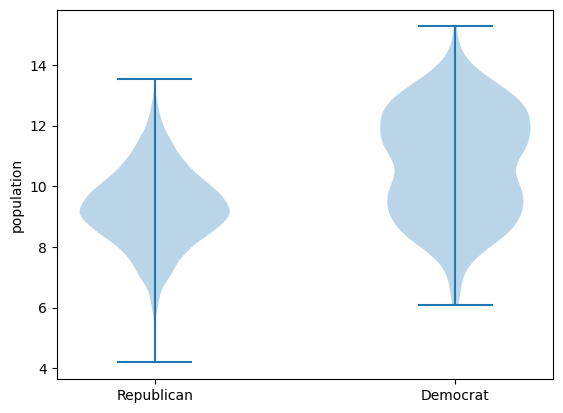

In [32]:
# Are the differences in total votes significant?  (Perhaps a proxy measure of population size)

# Extract the data
A = election_df.loc[election_df.winner_2020=='Republican','totalvotes_2020']
B = election_df.loc[election_df.winner_2020=='Democrat','totalvotes_2020']

group = election_df.groupby(by='winner_2020')
print(group['totalvotes_2020'].mean())
print('\n')

# Plot the results
plt.figure()
ax = plt.subplot(111)
_ = plt.violinplot((A.values,B.values))
_ = ax.set_xticks([1,2])
_ = ax.set_xticklabels(['Republican','Democrat'])
_ = plt.ylabel('population')

# Run the t-test
t,p = stats.ttest_ind(A,B)
print('t =',t,' p =',p)

# Extend this!

Now, join the data above to a CHR dataset to investigate where red counties are significantly different than blue counties with respect to some variable of interest